# Solow Growth Model: Initial Computations

## Initialization: Setting Up the Environment:

In [1]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# keep output cells from shifting to autoscroll...

In [3]:
%matplotlib inline 

In [4]:
# graphics setup: seaborn-whitegrid and figure size...
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 10
figure_size[1] = 7
plt.rcParams["figure.figsize"] = figure_size

In [5]:
# libraries...

import numpy as np
import pandas as pd

----

&nbsp;

## Programming Advice:

1. **Do** restart your kernel and run cells up to your current working point every fifteen minutes or so. Yes, it takes a little time. But if you don't, sooner or later the machine's namespace will get confused, and then you will get confused about the state of the machine's namespace, and by assuming things about it that are false you will lose hours and hours...

2. **Do** reload the page when restarting the kernel does not seem to do the job...

3. **Do** edit code cells by copying them below your current version and then working on the copy: when you break everything in the current cell (as you will), you can then go back to the old cell and start fresh...

4. **Do** exercise agile development practices: if there is a line of code that you have not tested, test it. The best way to test is to ask the machine to echo back to you the thing you have just created in its namespace to make sure that it is what you want it to be. Only after you are **certain** that your namespace contains what you think it does should you write the next line of code. And then you should immediately test it...

5. **Do** take screenshots of your error messages...

6. **Do** google your error messages: Ms. Google is your best friend here...

7. **Do not** confuse assignment ("=") and test for equality ("=="). In general, if there is an "if" anywhere nearby, you should be testing for equality. If there is not, you should be assignment a variable in your namespace to a value. **Do** curse the mathematicians 500 years ago who did not realize that in the twenty-first century it would be very convenient if we had different and not confusable symbols for equals-as-assignment and equals-as-test...

Any more insights you think belong on this list? Email them to me at brad.delong@gmail.com

----

&nbsp;

## The Solow Growth Model: Computational Explorations

Recall the four behavioral relationships in the Solow growth model: the determination of the labor-force L growth rate as equal to the parameter n; the efficiency-of-labor E growth rate as equal to the parameter g; the capital stock K growth rate as a function of the savings-investment share s of output Y, of the depreciation rate &delta;, and of the current output-to-capital ratio Y/K; and the production function determining the current level of output Y as a function of the current levels of the capital stock K, the labor force L, the efficiency-of-labor E, and the production function parameter—I don't have a good name for it—&alpha; (perhaps I should start calling it the relative capital orientation of growth: when &alpha; is zero capital accumulation does not matter for growth, and as &alpha; rises toward one it becomes more and more important for growth until, when it equals one, it is all that matters):

$ \frac{d(ln(L))}{dt} = n $

$ \frac{d(ln(E))}{dt} = g $

$ \frac{d(ln(K))}{dt} = \frac{sY}{K} - \delta $

$ ln(Y) = \alpha(ln(K)) + (1-\alpha)(ln(L) + ln(E)) $

Let's start an economy modeled by this with some set of parameter values and in some arbitary initial position. Let's let it develop over time according to its behavioral relationships. And let's see what happens:

In [6]:
# initialize the dataframe...
# covering T years

T = 200

sg_df = pd.DataFrame(index=range(T),columns=['Labor', 
    'Efficiency',
    'Capital',
    'Output',
    'Output_per_Worker',
    'Capital_Output_Ratio'],
    dtype='float')

print("Dataframe initialized without visible errors")

# you think that the machine is in some state: but you may be wrong...
# restart the kernel every ten minutes!

Dataframe initialized without visible errors


In [7]:
# parameter values: labor-force growth rate, efficiency-of-labor growth rate,
# depreciation rate on the capital stock, savings-investment share of output,
# and capital share in production α...

n = 0.0
g = 0.0
delta = 0.03
s = 0.15
alpha = 0.5

print("Parameters set without visible errors")

Parameters set without visible errors


In [8]:
# initial conditions: labor force, efficiency-of-labor, and 
# capital stock: change these parameters here...

L0 = 1000
E0 = 1
K0 = 5000

# initialize the dataframe at time 0 by setting L, E, K...

sg_df.Labor[0] = L0
sg_df.Efficiency[0] = E0
sg_df.Capital[0] = K0

# use the production function to calculate output at time 0...

sg_df.Output[0] = (sg_df.Capital[0]**alpha *
    (sg_df.Labor[0] * sg_df.Efficiency[0])**(1-alpha))

# calculate the last two initial values for the dataframe:
# output per worker and the capital output ratio...

sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]

print("Simulation initialize without visible errors")

Simulation initialize without visible errors


In [9]:
# And now we loop the system forward, watching what it does
# for T years...

for i in range(T):
    sg_df.Labor[i+1] = sg_df.Labor[i] + sg_df.Labor[i] * n
    sg_df.Efficiency[i+1] = sg_df.Efficiency[i] + sg_df.Efficiency[i] * g
    sg_df.Capital[i+1] = sg_df.Capital[i] - sg_df.Capital[i] * delta + sg_df.Output[i] * s 
    
    sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
    sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
    sg_df.Capital_Output_Ratio[i+1] = sg_df.Capital[i+1]/sg_df.Output[i+1]
    
print("Simulation ran without visible errors")

Simulation ran without visible errors


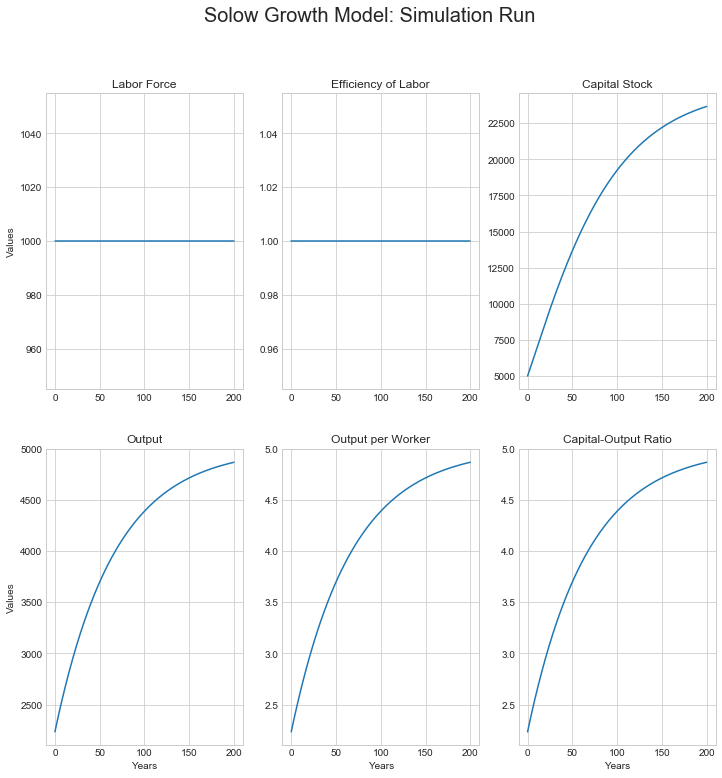

0.0 is the labor force growth rate n
0.0 is the efficiency of labor growth rate g
0.03 is the depreciation rate delta
0.15 is the savings rate s
0.5 is the decreasing-returns-to-scale parameter alpha


In [11]:
# plot the results...

fig = plt.figure(figsize=(12, 12))

ax1 = plt.subplot(2,3,1)
sg_df.Labor.plot(ax = ax1, title = "Labor Force")
plt.ylabel("Values")

ax2 = plt.subplot(2,3,2)
sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")

ax3 = plt.subplot(2,3,3)
sg_df.Capital.plot(ax = ax3, title = "Capital Stock")

ax4 = plt.subplot(2,3,4)
sg_df.Output.plot(ax = ax4, title = "Output")
plt.xlabel("Years")
plt.ylabel("Values")

ax5 = plt.subplot(2,3,5)
sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
plt.xlabel("Years")

ax6 = plt.subplot(2,3,6)
sg_df.Capital_Output_Ratio.plot(ax = ax6, title = "Capital-Output Ratio")
plt.xlabel("Years")

plt.suptitle('Solow Growth Model: Simulation Run', size = 20)

plt.show()

print(n, "is the labor force growth rate n")
print(g, "is the efficiency of labor growth rate g")
print(delta, "is the depreciation rate delta")
print(s, "is the savings rate s")
print(alpha, "is the decreasing-returns-to-scale parameter alpha")


In [12]:
# we are going to want to see what happens for lots of
# different model parameter values and initial conditions,
# so stuff all of that inside a function, so we can then
# invoke it with a single line...

def sgm_200yr_run(L0, E0, K0, n=0, g=0, s=0.15, alpha=0.5, delta=0.03, T = 200):

    sg_df = pd.DataFrame(index=range(T),columns=['Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio'],
        dtype='float')

    sg_df.Labor[0] = L0
    sg_df.Efficiency[0] = E0
    sg_df.Capital[0] = K0
    sg_df.Output[0] = (sg_df.Capital[0]**alpha * (sg_df.Labor[0] * sg_df.Efficiency[0])**(1-alpha))
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]

    for i in range(T):
        sg_df.Labor[i+1] = sg_df.Labor[i] + sg_df.Labor[i] * n
        sg_df.Efficiency[i+1] = sg_df.Efficiency[i] + sg_df.Efficiency[i] * g
        sg_df.Capital[i+1] = sg_df.Capital[i] - sg_df.Capital[i] * delta + sg_df.Output[i] * s 
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = sg_df.Capital[i+1]/sg_df.Output[i+1]

        
    fig = plt.figure(figsize=(12, 12))

    ax1 = plt.subplot(2,3,1)
    sg_df.Labor.plot(ax = ax1, title = "Labor Force")
    plt.ylabel("Values")

    ax2 = plt.subplot(2,3,2)
    sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")

    ax3 = plt.subplot(2,3,3)
    sg_df.Capital.plot(ax = ax3, title = "Capital Stock")

    ax4 = plt.subplot(2,3,4)
    sg_df.Output.plot(ax = ax4, title = "Output")
    plt.ylabel("Values")
    plt.xlabel("Years")

    ax5 = plt.subplot(2,3,5)
    sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
    plt.xlabel("Years")

    ax6 = plt.subplot(2,3,6)
    sg_df.Capital_Output_Ratio.plot(ax = ax6, title = "Capital-Output Ratio")
    plt.xlabel("Years")

    plt.suptitle('Solow Growth Model: Simulation Run', size = 20)

    plt.show()
    
    print(n, "is the labor force growth rate: n")
    print(g, "is the efficiency of labor growth rate: g")
    print(delta, "is the depreciation rate: delta")
    print(s, "is the savings rate: s")
    print(alpha, "is the decreasing-returns-to-scale parameter: alpha")

print("Function creation ran without visible errors")

Function creation ran without visible errors


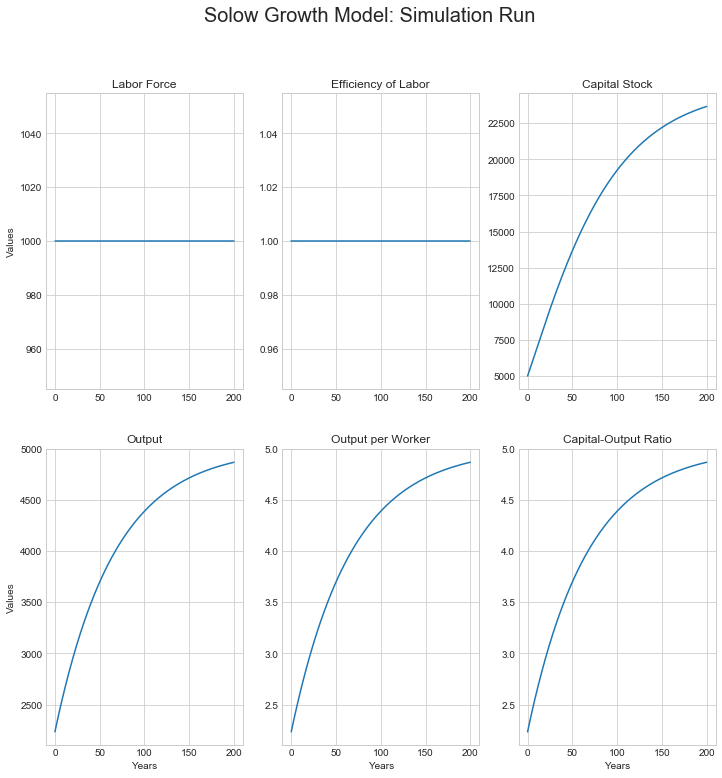

0 is the labor force growth rate: n
0 is the efficiency of labor growth rate: g
0.03 is the depreciation rate: delta
0.15 is the savings rate: s
0.5 is the decreasing-returns-to-scale parameter: alpha


In [13]:
# and repeat our calculations to see if we have gotten it right...

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 5000)

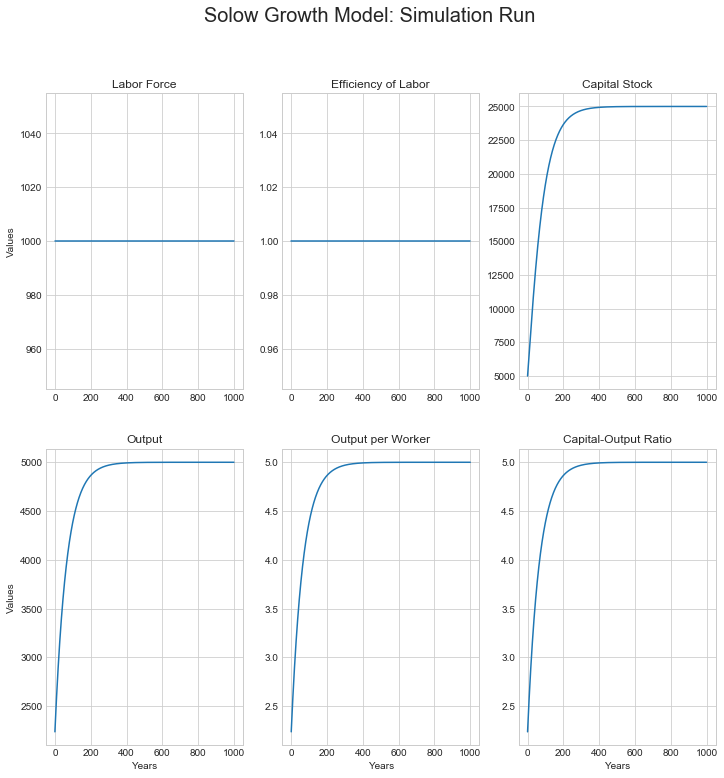

0 is the labor force growth rate: n
0 is the efficiency of labor growth rate: g
0.03 is the depreciation rate: delta
0.15 is the savings rate: s
0.5 is the decreasing-returns-to-scale parameter: alpha


In [14]:
# Is it really heading a situation in which all variables are unchanging?

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 5000, T = 1000)

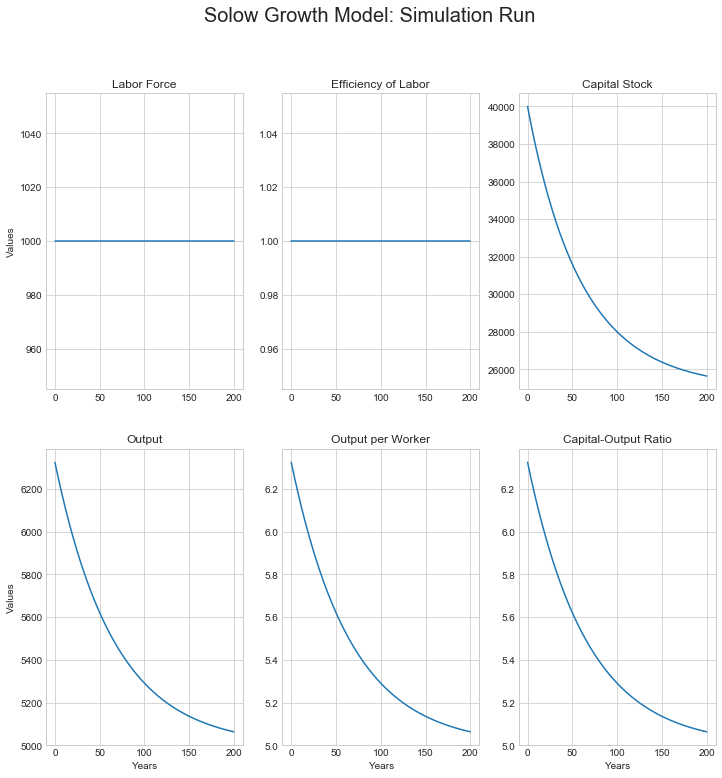

0 is the labor force growth rate: n
0 is the efficiency of labor growth rate: g
0.03 is the depreciation rate: delta
0.15 is the savings rate: s
0.5 is the decreasing-returns-to-scale parameter: alpha


In [15]:
# start with a high rather than a low initial capital stock...

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 40000)

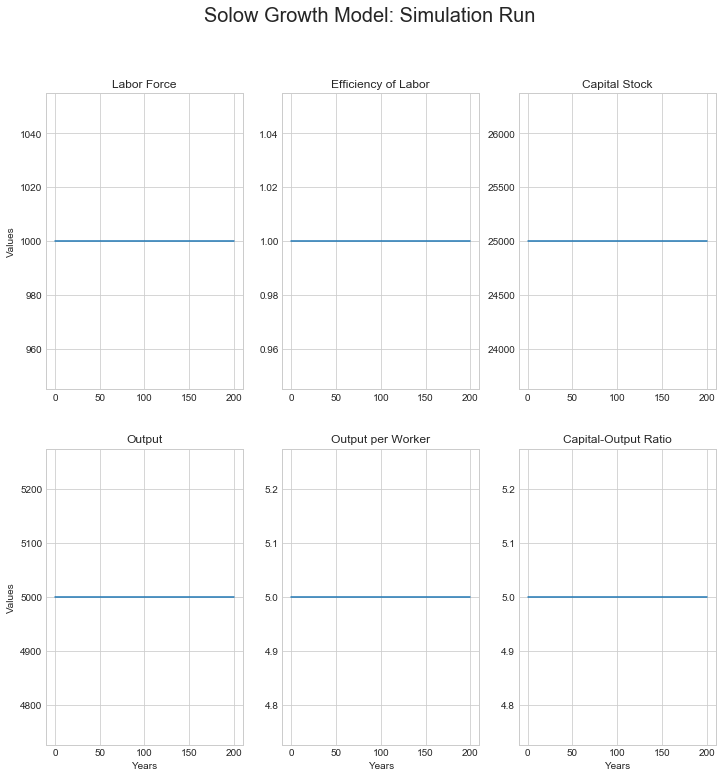

0 is the labor force growth rate: n
0 is the efficiency of labor growth rate: g
0.03 is the depreciation rate: delta
0.15 is the savings rate: s
0.5 is the decreasing-returns-to-scale parameter: alpha


In [16]:
# with an initial capital stock at what looks like the
# asymptote for the K/Y ratio...

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 25000)

----

&nbsp;

Set n = 0, g = 0, the economy has no long-run tendency to grow: it heads for a stagnant steady state, with all variables constant, and with the capital output ratio K/Y equal to, in this simulation run, 5. What combination of our parameters might possibly give us a 5? Well 5 = 0.15/.03 = s/δ...

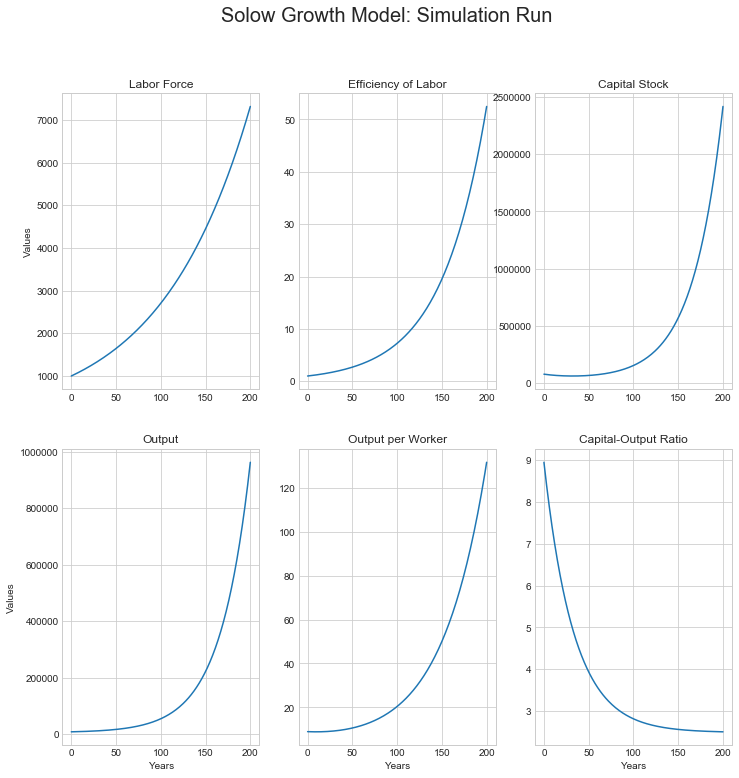

0.01 is the labor force growth rate: n
0.02 is the efficiency of labor growth rate: g
0.03 is the depreciation rate: delta
0.15 is the savings rate: s
0.5 is the decreasing-returns-to-scale parameter: alpha


In [17]:
# Now let's let there be some labor-force growth,
# and some efficiency-of-labor growth...
# starting from a high capital stock

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 80000, g = 0.02, n = 0.01,
    s = 0.15)

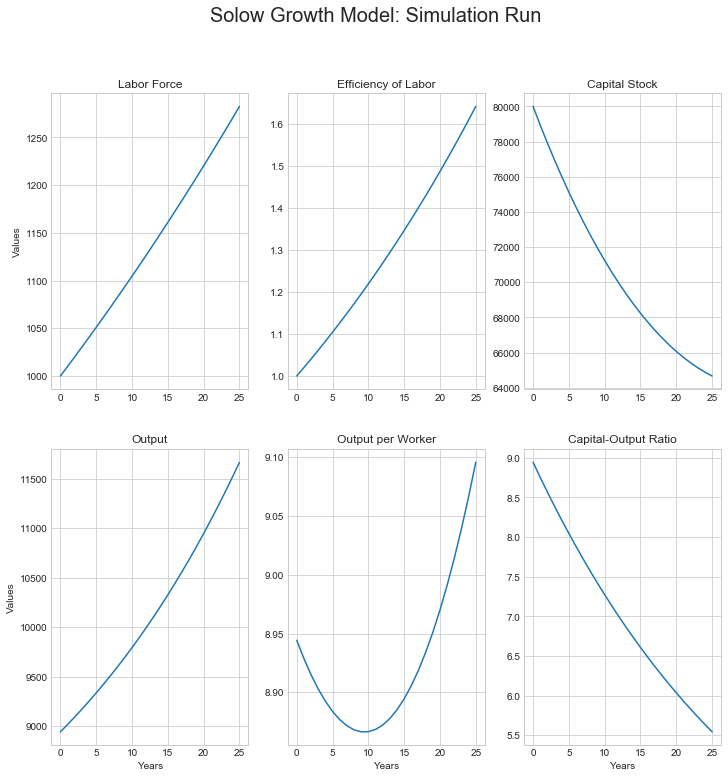

0.01 is the labor force growth rate: n
0.02 is the efficiency of labor growth rate: g
0.03 is the depreciation rate: delta
0.15 is the savings rate: s
0.5 is the decreasing-returns-to-scale parameter: alpha


In [18]:
# What happens at the start?

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 80000, g = 0.02, n = 0.01,
    s = 0.15, T=25)

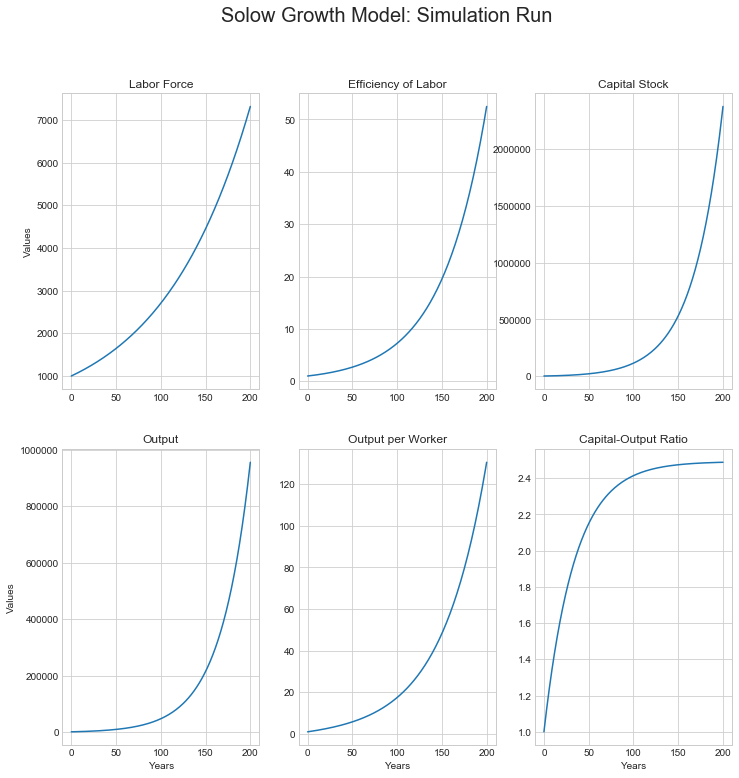

0.01 is the labor force growth rate: n
0.02 is the efficiency of labor growth rate: g
0.03 is the depreciation rate: delta
0.15 is the savings rate: s
0.5 is the decreasing-returns-to-scale parameter: alpha


In [19]:
# Now let's start with a low initial capital stock...

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 1000, g = 0.02, n = 0.01,
    s = 0.15)

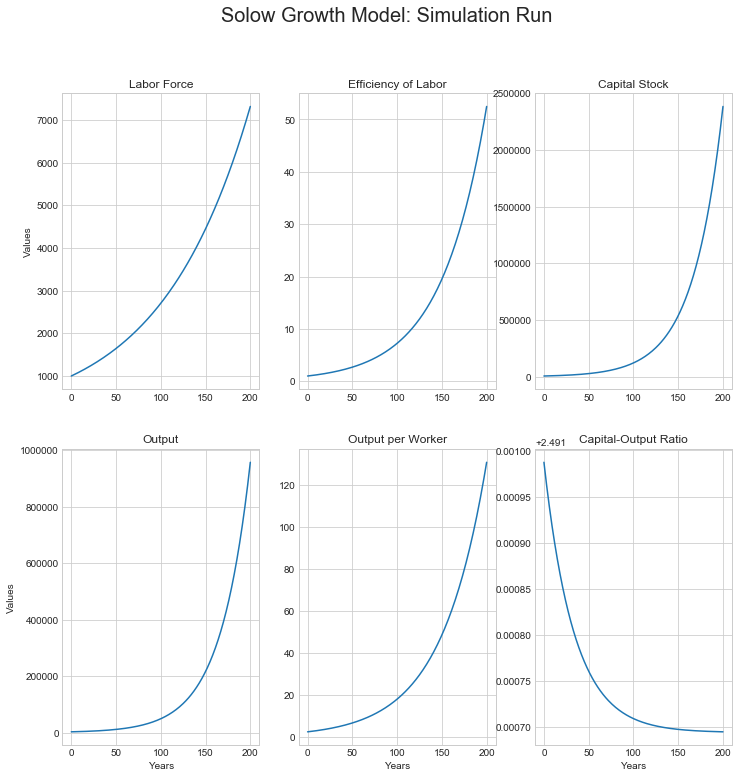

0.01 is the labor force growth rate: n
0.02 is the efficiency of labor growth rate: g
0.03 is the depreciation rate: delta
0.15 is the savings rate: s
0.5 is the decreasing-returns-to-scale parameter: alpha


In [20]:
# Now let's start with an intermediate capital stock

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 6210, g = 0.02, n = 0.01,
    s = 0.15, delta = 0.03)

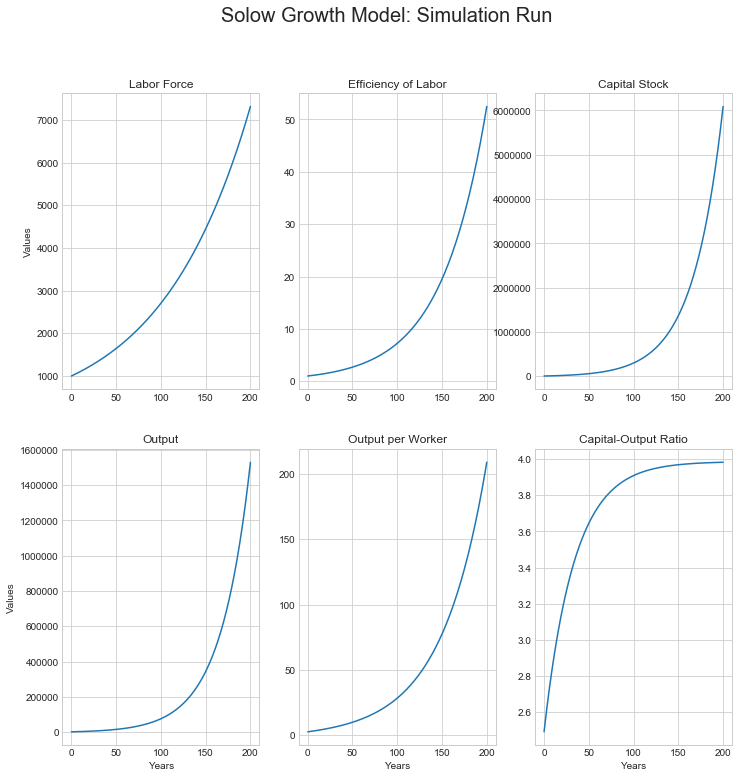

0.01 is the labor force growth rate: n
0.02 is the efficiency of labor growth rate: g
0.03 is the depreciation rate: delta
0.24 is the savings rate: s
0.5 is the decreasing-returns-to-scale parameter: alpha


In [21]:
# Note the asymptote for the capital-output ratio: 2.5±:
# = s/(n+g+delta)
# let's see if this holds in general

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 6210, g = 0.02, n = 0.01,
    s = 0.24, delta = 0.03)

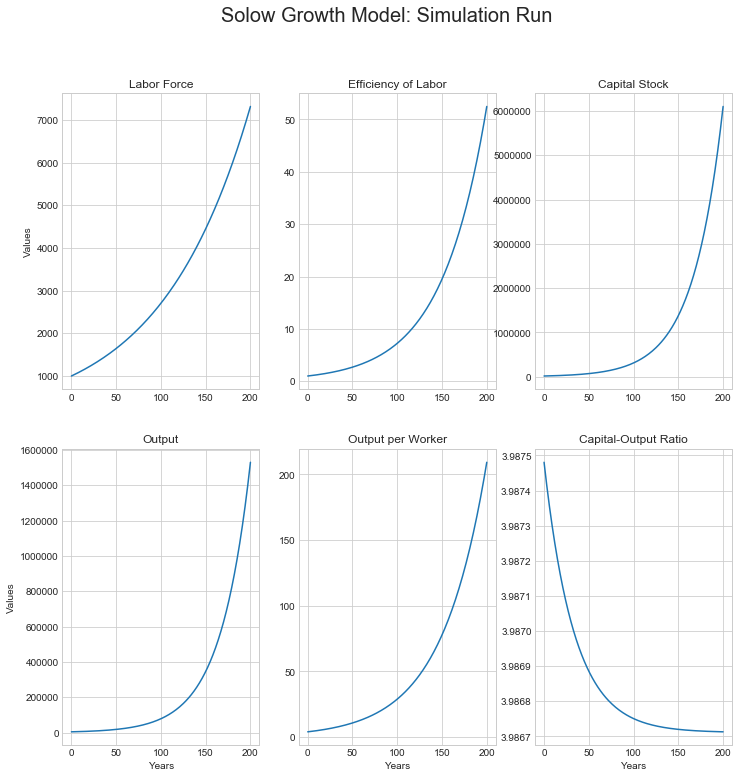

0.01 is the labor force growth rate: n
0.02 is the efficiency of labor growth rate: g
0.03 is the depreciation rate: delta
0.24 is the savings rate: s
0.5 is the decreasing-returns-to-scale parameter: alpha


In [22]:
# What are the rates of growth of this economy in the long run?

sgm_200yr_run(L0 = 1000, E0 = 1, K0 = 15900, g = 0.02, n = 0.01,
    s = 0.24, delta = 0.03, T = 200)

In [23]:
# output per worker grows from 50 in year 125 to 210 in year 200

np.log(210/50)/75

0.01913446033719097

In [24]:
# Output per worker grows at the rate of growth of the efficiency
# of labor once the economy has reached its steady-state growth
# path...

# We see that this happens: now we can do the algebra to get
# more insight into why this model works out this way...